**Qual o perfil dos clientes que desistem do serviço?**

Como comentado anteriormente, o Churn é um indicativo de gestão da empresa e controlá-lo se faz necessário para evitar problemas futuros. 

Uma das maneiras que podemos diminuir o Churn é prever quais clientes têm mais risco de evasão. Assim, conseguimos tomar medidas preventivas.

 Modelos de Machine Learning são técnicas poderosa para esse fim, ao utilizar essa ferramenta, você poderá descobrir com facilidade aqueles clientes que têm um risco maior de Churn.

Nesse artigo iremos continuar a análise do conjunto de dados de uma agência bancária, apresentado no último artigo.

Essa série de artigo foi dividida em 6 etapas:

1.   Entendimento do Problema
2.   Obtenção dos dados
3.   Análise Exploratória dos dados
4.   Pré-processamento
5.   Modelos de Machine Learning
6.   Avaliação do modelo 

O entendimento do problema foi abordado no primeiro artigo dessa série de artigos. Na primeira parte, dessa série de artigos, apresentamos os dados e análise exploratória de dados, afim de identificar o perfil dos clientes que cancelaram o contrato com a agência bancária. 

# **Recordando**

Os dados utilizados aqui foram extraídos do Kaggle e são dados de clientes de uma agência bancária. Utilizaremos o Google Colab para fazer as análises.

**Permitindo o acesso do Google Colab ao Drive**

Para importar os dados, que estão salvo no Google Drive, é necessário permitir o acesso do Colab. Para isso precisamos rodar os comandos abaixo e clicar na URL que irá aparecer, copiar e colar o código de acesso no Colab. 

In [ ]:
#Acesso ao drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
##IMPORTANDO ARQUIVOS
#escrevendo em um arquivo csv
df= pd.read_csv('/content/drive/My Drive/kaggle_datasets/Churn_Modelling.csv')
df.head(10) #visualizando as 10 primeiras linhas do dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


No conjunto de dados temos as seguinte variáveis:

* CustomerId: identificação do cliente;
* Surname: sobrenome do clientes;
* CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
* Geography: país que o serviço é oferecido;
* Gender: sexo do cliente;
* Age: idade do cleinte;
* Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade. 
* Balance: saldo da conta corrente;
* NumOfProducts: número de produtos bancários adquiridos;
* HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
* IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
* EstimatedSalary: salário estimado;
* Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).

No artigo anterior concluimos que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

Assim, clientes com essas características possui um risco maior de cancelarem o serviço bancário.

# **4. Pré-Processamento dos dados**

Nessa seção precisamos transformar as variáveis para utilizá-las nos modelos de Machine Learning. Teremos as seguintes etapas

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados missing;
* Separação das variáveis categóricas, numéricas e resposta;
* Processamento variáveis categóricas;
* Processamento variáveis numéricas.


##**Feature Selection**
Em conjunto de dados reais é comum existir variáveis que não tem utilidade prática, por exemplo, as variáveis 'RowNumber' (número da linha), Surname (Sobrenome) e 'CustomerId'(ID do Cliente) não trazem informações relevantes para entender o Churn de clientes. Assim, iremos eliminar essas variáveis utilizando a função drop().

In [ ]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##**B. Identificando dados faltantes**

Nada é perfeito nesse mundo e na análise de dados isso também é verdade. Dados faltantes, ou dados missing, são comuns em dados reais, isso pode ocorrer por vários motivos.

Por exemplo, a pessoa que fez o cadastro esqueceu de preencher essa informação, ou a dona da conta não tinha essa informação quando fez o cadastro, ou simplesmente essa informação era desconhecida.

Assim para identificar a presença de dados faltantes no conjunto de dados, utilizamos os comandos a seguir

In [ ]:
#Contato número de observações faltantes no dataset para cada variável
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observamos que nenhuma variável em estudo apresenta dados faltantes, dados missing. Assim, não teremos o processo de tratamento dos dados faltantes. 

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
%matplotlib inline

In [ ]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


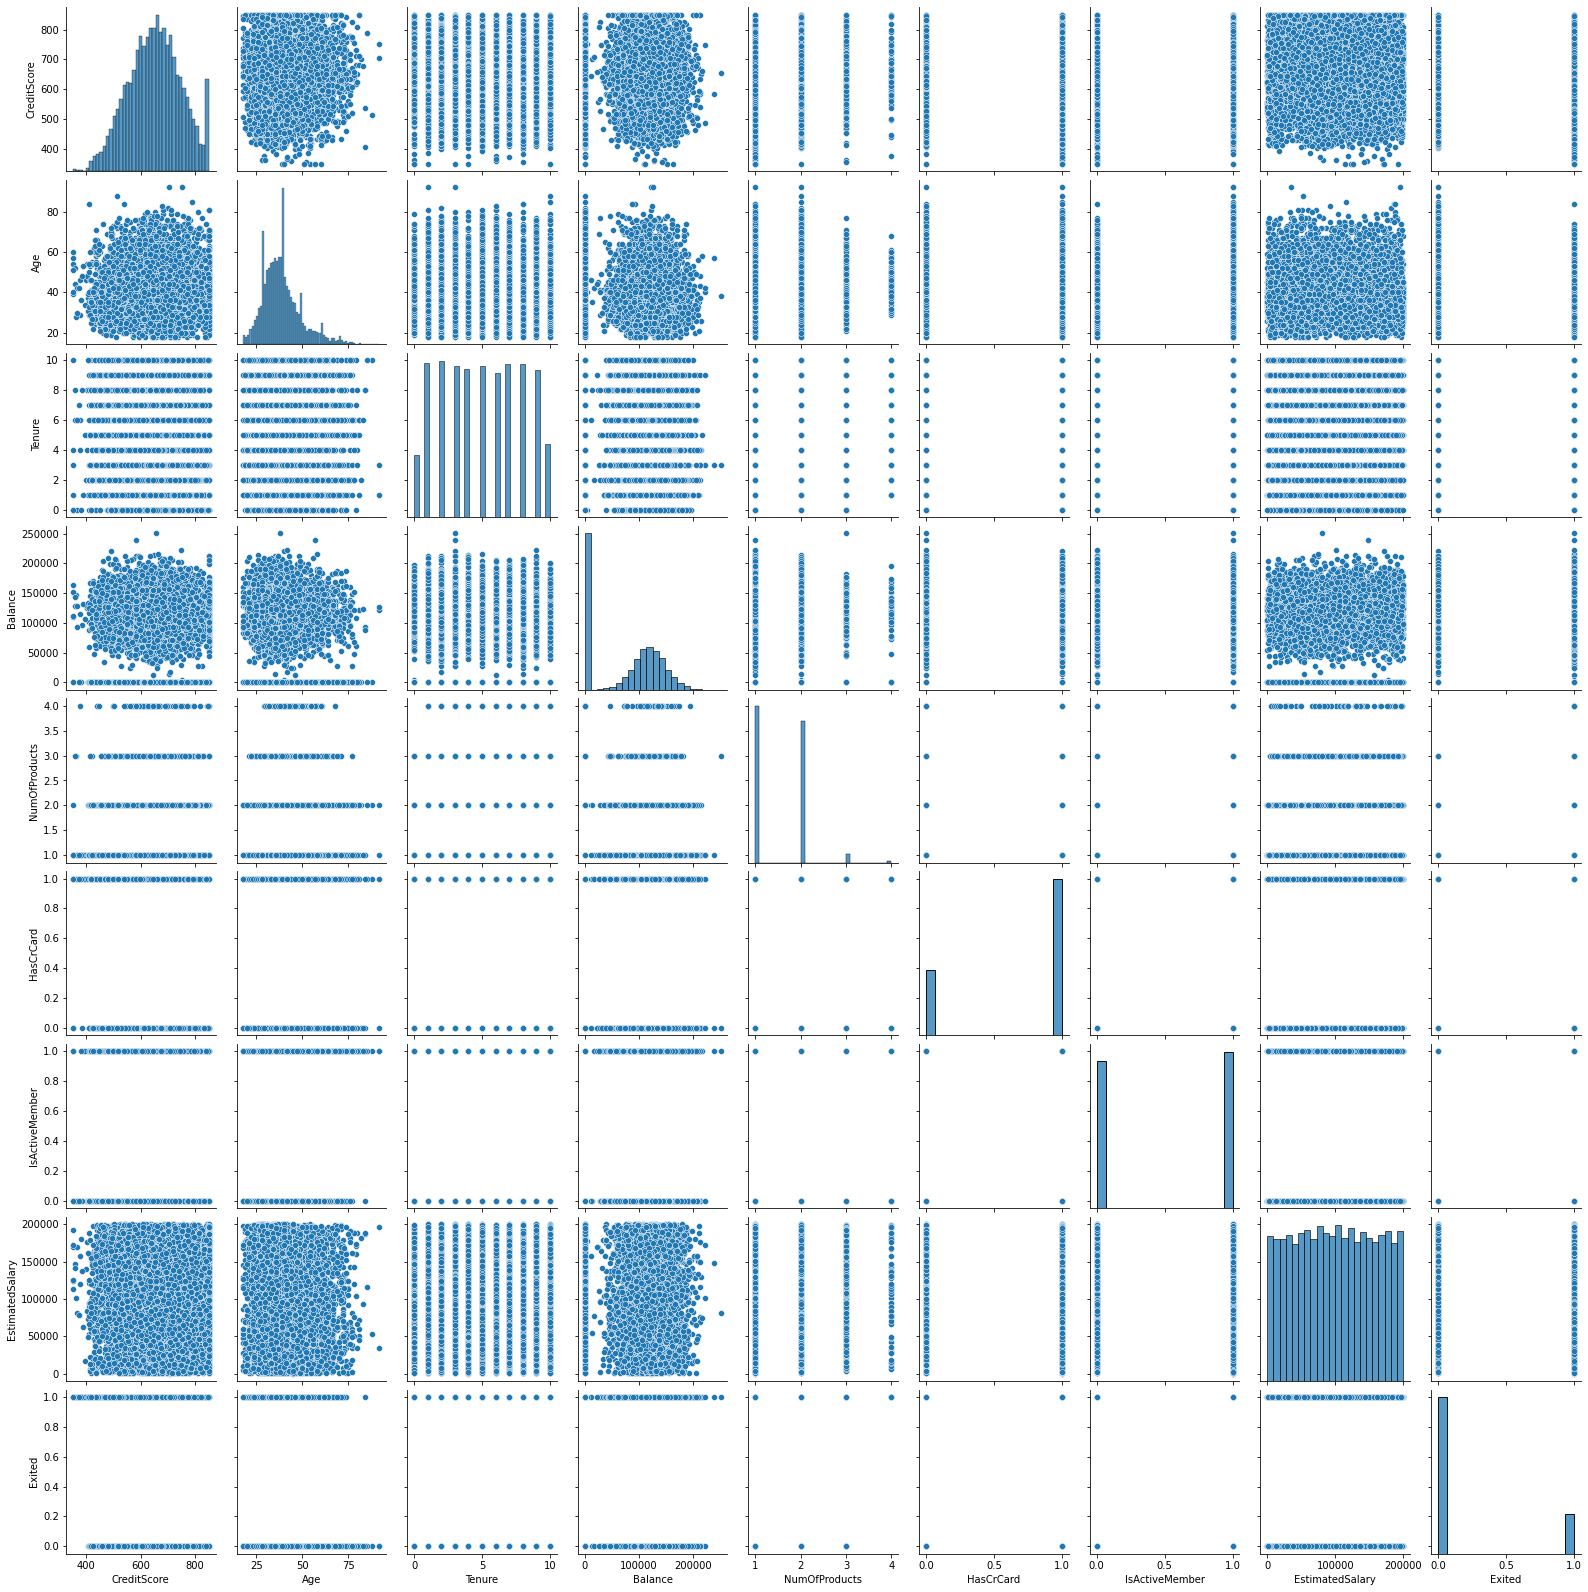

In [ ]:
sb.pairplot(df1)

In [ ]:
X = np.array(df.drop('Exited',axis = 1))

In [ ]:
X

array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [ ]:
n_samples = 500
random_state = 0
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([2, 1, 3, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 3,
       1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 3, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 0, 1, 0, 2, 1, 0, 3, 0, 2, 1, 2, 3, 2, 0, 3, 1, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 2, 1, 3, 1, 0, 2, 3, 0, 3, 1, 2, 2, 3, 1, 0,
       3, 2, 2, 1, 0, 3, 1, 1, 2, 1, 0, 2, 1, 2, 3, 1, 3, 3, 0, 3, 1, 1,
       2, 2, 3, 3, 0, 0, 2, 3, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 3, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 0, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 1, 1, 1,
       2, 1, 3, 3, 1, 2, 3, 3, 3, 2, 1, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1, 0,
       3, 0, 1, 0, 3, 0, 1, 2, 2, 0, 3, 1, 3, 3, 0, 1, 3, 2, 1, 2, 1, 1,
       3, 0, 1, 1, 3, 0, 0, 2, 3, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 3, 1, 2,
       2, 2, 0, 1, 2, 0, 3, 1, 1, 3, 1, 1, 0, 2, 1, 2, 3, 3, 0, 3, 2, 0,
       2, 0, 2, 1, 1, 1, 1, 3, 3, 2, 3, 3, 0, 0, 1, 3, 3, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 2, 2, 1, 3, 2, 2, 1, 2, 3], d

In [ ]:
kmeans.labels_.size

300